<a href="https://colab.research.google.com/github/liman8/Notebooks/blob/main/zadatak1_EDA_resenja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vežba 3: EDA
---



Prvo je potrebno učitati biblioteke za rad sa podacima i iscrtavanje.

In [ ]:
# učitavanje biblioteka
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# podešavanja ispisa
pd.set_option('display.float_format', lambda x: '%.2f' % x) # prikaz df na 2 decimale (npr. za describe)
celzijusi = u'\N{DEGREE SIGN}C' # oznaka za stepene celzijusa

U radni folder kopirati datoteku *city_temperature.csv*. Podatke možete naći [ovde](https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities/data?select=city_temperature.csv).

Treba učitati skup podataka o prosečnim dnevnim temperaturama u najvećim svetskim gradovima. Kog formata su podaci? Šta se nalazi po vrstama, a šta po kolonama - šta su uzorci, a šta obeležja? Koliko ima uzoraka, a koliko obeležja? Za odgovor na ova pitanja iskoristiti `shape` i `dtypes`.


In [ ]:
!gdown 1mig6WygA9fCZlKSRf0FQFLqXc241-qVd

Downloading...
From (original): https://drive.google.com/uc?id=1mig6WygA9fCZlKSRf0FQFLqXc241-qVd
From (redirected): https://drive.google.com/uc?id=1mig6WygA9fCZlKSRf0FQFLqXc241-qVd&confirm=t&uuid=aea14a81-8eed-4548-845f-b911415d4142
To: /content/city_temperature.csv
100% 141M/141M [00:02<00:00, 63.5MB/s]


In [ ]:
# učitavanje u dataframe format
df = pd.read_csv('city_temperature.csv')

# format podataka
print("shape: \n", df.shape)
print("\n types:\n", df.dtypes, "\n")
df.head()


<ipython-input-4-7f80432e6f65>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('city_temperature.csv')


shape: 
 (2906327, 8)

 types:
 Region             object
Country            object
State              object
City               object
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
dtype: object 



,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.20
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.40
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.80
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.40
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.90


Podaci za temperaturu su u farenhajtima, te ih zarad lakše interpretacije treba pretvoriti u celzijuse po formuli:

T_celzijus = (T_farenhajt - 32) * 5/9.

In [ ]:
# Pretvaranje farenhajta u celzijuse
to_celsius = (df['AvgTemperature'] - 32) * 5 / 9
df['AvgTemperature'] = np.round(to_celsius, 2)
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,17.89
1,Africa,Algeria,NaN,Algiers,1,2,1995,9.67
2,Africa,Algeria,NaN,Algiers,1,3,1995,9.33
3,Africa,Algeria,NaN,Algiers,1,4,1995,8.00
4,Africa,Algeria,NaN,Algiers,1,5,1995,8.83


Proveriti da li je skup podataka potpun korišćenjem funkcije `isnull` i koliko podataka nedostaje u odnosu na ukupan broj uzoraka.

In [ ]:
NANs = df.isnull().sum()
print(NANs)
udeo = df.isnull().sum()/len(df)*100
print("\n Procenat NaN: \n", udeo)

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

 Procenat NaN: 
 Region            0.00
Country           0.00
State            49.93
City              0.00
Month             0.00
Day               0.00
Year              0.00
AvgTemperature    0.00
dtype: float64


Proveriti koliko različitih regiona, država i saveznih država se nalazi u podacima (pomoć: nazivi kolona su *Region*, *Country* i *State*).

In [ ]:
print('Regioni: \n', df['Region'].unique())
print('\n Države: \n', df['Country'].unique())
print('\n Savezne države: \n', df['State'].unique())

Regioni: 
 ['Africa' 'Asia' 'Australia/South Pacific' 'Europe' 'Middle East'
 'North America' 'South/Central America & Carribean']

 Države: 
 ['Algeria' 'Burundi' 'Benin' 'Central African Republic' 'Congo' 'Egypt'
 'Ethiopia' 'Gabon' 'Gambia' 'Guinea' 'Guinea-Bissau' 'Ivory Coast'
 'Kenya' 'Morocco' 'Madagascar' 'Mauritania' 'Malawi' 'Mozambique'
 'Namibia' 'Nigeria' 'Senegal' 'Sierra Leone' 'South Africa' 'Togo'
 'Tunisia' 'Tanzania' 'Uganda' 'Zambia' 'Bangladesh' 'China' 'Hong Kong'
 'India' 'Indonesia' 'Japan' 'Kazakhstan' 'Kyrgyzstan' 'Laos' 'Malaysia'
 'Mongolia' 'Myanmar (Burma)' 'Nepal' 'North Korea' 'Pakistan'
 'Philippines' 'Singapore' 'South Korea' 'Sri Lanka' 'Taiwan' 'Tajikistan'
 'Thailand' 'Turkmenistan' 'Uzbekistan' 'Vietnam' 'Australia'
 'New Zealand' 'Albania' 'Austria' 'Belarus' 'Belgium' 'Bulgaria'
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Finland' 'France'
 'Germany' 'Georgia' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy'
 'Latvia' 'Macedonia' 'The Netherlan

S obzirom da obeležje *State* postoji samo za američke gradove, to obeležje se može izbaciti iz razmatranja. Ako u kasnijoj analizi bude potrebno detaljnije ispitivanje američkih gradova po državama, može se ponovo uzeti u obzir.

In [ ]:
df.drop(['State'], inplace= True, axis = 1)

Izbacivanjem obeležja *State* je rešen problem nedostajućih podataka, pa se mogu analizirati ostala obeležja. Sledeće treba izračunati osnovne statističke veličine za svako od obeležja pomoću funkcije `describe`.

In [ ]:
print(df.describe())

           Month        Day       Year  AvgTemperature
count 2906327.00 2906327.00 2906327.00      2906327.00
mean        6.47      15.72    2006.62           13.34
std         3.46       8.80      23.38           17.85
min         1.00       0.00     200.00          -72.78
25%         3.00       8.00    2001.00            7.67
50%         6.00      16.00    2007.00           16.94
75%         9.00      23.00    2013.00           24.17
max        12.00      31.00    2020.00           43.33


Na osnovu minimalne i maksimalne vrednosti, može se videti da mesec ide od 1 do 12, što deluje u redu. Dani idu od 0 do 31, što nije u skladu sa očekivanjima. Razlog je najverovatnije zamena nedostajućih vrednosti za obeležje *Day* nulama, što bi moglo da uzrokuje probleme pri daljoj analizi. Kod obeležja *Year* sumnjivo je postojanje 200. godine. Ispisom svih različitih vrednosti godina iz baze se može videti da li je to greška ili možda oznaka za nedostajuću vrednost. Takođe se primećuje da je najniža temperatura čak -72.78, što teoretski može biti stvarna vrednost (najniža zabeležena temperatura je -89 na Antarktiku), međutim imajući u vidu da se meri u gradovima i pogotovo ako ima veći broj takvih vrednosti, onda je najverovatnije -72.78 C tj. -99 F bila oznaka za nedostajuće vrednosti.

In [ ]:
print(df['Year'].unique())

[1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020  201  200]


Po svemu sudeći, vrednosti 200 i 201 su greške i treba ih nekako zameniti pre početka analize. Za početak, nedozvoljene vrednosti godine i dana treba zameniti sa `NaN` kako bi bilo jasnije šta predstavljaju, a kasnije i temperaturu izanalizirati i srediti.

In [ ]:
df['Day'] = df['Day'].replace(0, np.nan)
df['Year'] = df['Year'].replace(200, np.nan)
df['Year'] = df['Year'].replace(201, np.nan)

Utvrditi koliko je nedostajućih vrednosti u svakoj od varijabli i rešiti problem. Kog su tipa  nedostajući podaci u ovom skupu? Da li je interpolacija pomoću funkcije `fillna` odgovarajuća metoda ili je bolji pristup brisanje?

In [ ]:
print('Day: broj uzoraka:', df['Day'].isna().sum(), 'tj.', df['Day'].isna().sum()/len(df)*100, '%')
print('Year: broj uzoraka:', df['Year'].isna().sum(), 'tj.', df['Year'].isna().sum()/len(df)*100, '%')

Day: broj uzoraka: 8 tj. 0.000275261524253809 %
Year: broj uzoraka: 440 tj. 0.015139383833959495 %


Kako za dan i godinu vrlo mali broj uzoraka nedostaje (ispod 1%), ovi uzorci se mogu obrisati. Za dopunu podataka bi bilo potrebno proveriti kada dolazi do nedostajućih vrednosti: npr. da li u bazi dani idu redom, pa se nedostajuća vrednost može popuniti na osnovu prethodne i naredne vrednosti. Kada je obeležje godine u pitanju, može se primeniti sličan pristup. Zarad jednostavnosti, u ovoj vežbi će se obrisati uzorci tj. redovi gde nisu poznate vrednosti za dan ili godinu.

In [ ]:
# brisanje
df.dropna(inplace = True, axis=0)

# zamena medijanom bi se radila na sledeći način:
#df['Day'].fillna(df['Day'].median(), inplace = True)
#df['Year'].fillna(df['Year'].median(), inplace = True)

Sledeće treba odrediti koliko je nedostajućih vrednosti za prosečnu temperaturu po gradu. Prvo se može proveriti koliko je često da temperatura bude ispod -60, i tim redovima dodeliti `NaN` za vrednost temperature.

In [ ]:
df.loc[df['AvgTemperature'] < -60,'AvgTemperature'] = np.nan
print('AvgTemperature: broj uzoraka:', df['AvgTemperature'].isna().sum(), 'tj.', df['AvgTemperature'].isna().sum()/len(df)*100, '%')

AvgTemperature: broj uzoraka: 79224 tj. 2.726335129576971 %


Gradovi kojima nedostaje više od 10 % podataka se mogu ignorisati tj. izbrisati iz baze, a za ostale ćemo dopuniti vrednosti propagirajući poslednju validnu vrednost do naredne validne vrednosti. Napraviti listu svih gradova koje treba obrisati.

In [ ]:
gb = df.groupby(by='City').count() # broji validne vrednosti po obeležju za svaki grad (samo za AvgTemperature postoje NaN)
del_city = []
for i in df['City'].unique():
    if gb.loc[i, 'AvgTemperature']/gb.loc[i,'Day'] < 0.9:
        del_city.append(i)
print(del_city)

['Bujumbura', 'Addis Ababa', 'Banjul', 'Conakry', 'Bissau', 'Nairobi', 'Lilongwe', 'Lagos', 'Freetown', 'Kampala', 'Dhaka', 'Jakarta', 'Katmandu', 'Dusanbe', 'Tirana', 'Nicosia', 'Bonn', 'Frankfurt', 'Hamburg', 'Muscat', 'Guadalajara', 'Georgetown', 'Port au Prince', 'Paramaribo', 'San Juan Puerto Rico']


In [ ]:
print(gb)

              Region  Country  Month   Day  Year  AvgTemperature
City                                                            
Abidjan         9266     9266   9266  9266  9266            9002
Abilene         9266     9266   9266  9266  9266            9238
Abu Dhabi       9266     9266   9266  9266  9266            9232
Addis Ababa     9266     9266   9266  9266  9266            7143
Akron Canton    9265     9265   9265  9265  9265            9249
...              ...      ...    ...   ...   ...             ...
Yerevan         3226     3226   3226  3226  3226            3188
Youngstown      9265     9265   9265  9265  9265            9249
Yuma            4380     4380   4380  4380  4380            4087
Zagreb          9265     9265   9265  9265  9265            8813
Zurich          9266     9266   9266  9266  9266            9229

[321 rows x 6 columns]


In [ ]:
print('Broj uzoraka i obelezja pre brisanja: ', df.shape)
print('Broj jedinstvenih gradova pre brisanja: ', len(df['City'].unique()))
df = df[~df['City'].isin(del_city)]
#for c in del_city:
#    df.drop(df.loc[df['City']==c].index, axis=0, inplace=True)
print('Broj uzoraka i obelezja posle brisanja: ', df.shape)
print('Broj jedinstvenih gradova posle brisanja: ', len(df['City'].unique()))

Broj uzoraka i obelezja pre brisanja:  (2905879, 7)
Broj jedinstvenih gradova pre brisanja:  321
Broj uzoraka i obelezja posle brisanja:  (2716826, 7)
Broj jedinstvenih gradova posle brisanja:  296


Ostalo je da se uradi dopuna preostalih nedostajućih vrednosti ponavljanjem poslednje prethodne validne.

In [ ]:
print(df.isnull().sum())
df['AvgTemperature'].fillna(method='ffill', inplace=True)
print(df.isnull().sum())

Region                0
Country               0
City                  0
Month                 0
Day                   0
Year                  0
AvgTemperature    22884
dtype: int64


<ipython-input-18-7f26810f2d7c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AvgTemperature'].fillna(method='ffill', inplace=True)
<ipython-input-18-7f26810f2d7c>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['AvgTemperature'].fillna(method='ffill', inplace=True)


Region            0
Country           0
City              0
Month             0
Day               0
Year              0
AvgTemperature    0
dtype: int64


In [ ]:
df.describe()

,Month,Day,Year,AvgTemperature
count,2716826.00,2716826.00,2716826.00,2716826.00
mean,6.47,15.72,2006.97,15.45
std,3.46,8.80,7.29,10.64
min,1.00,1.00,1995.00,-45.56
25%,3.00,8.00,2001.00,8.17
50%,6.00,16.00,2007.00,16.94
75%,9.00,23.00,2013.00,24.06
max,12.00,31.00,2020.00,43.33


Prikazati *boxplot* dijagrame i histograme za prosečnu godišnju temperaturu po regionu korišćenjem `boxplot` i `hist` iz biblioteke `Matplotlib`.

In [ ]:
# postaviti region za indeks zbog lakšeg pretraživanja pomoću dataframe.loc[]
df_region = df.set_index('Region')
df_region.head()

,Country,City,Month,Day,Year,AvgTemperature
Region,,,,,,
Africa,Algeria,Algiers,1,1.00,1995.00,17.89
Africa,Algeria,Algiers,1,2.00,1995.00,9.67
Africa,Algeria,Algiers,1,3.00,1995.00,9.33
Africa,Algeria,Algiers,1,4.00,1995.00,8.00
Africa,Algeria,Algiers,1,5.00,1995.00,8.83


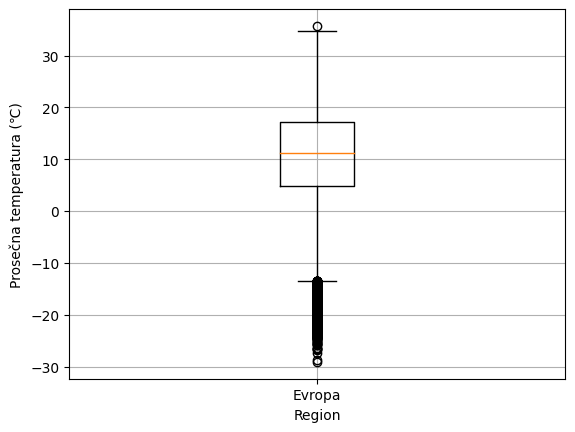

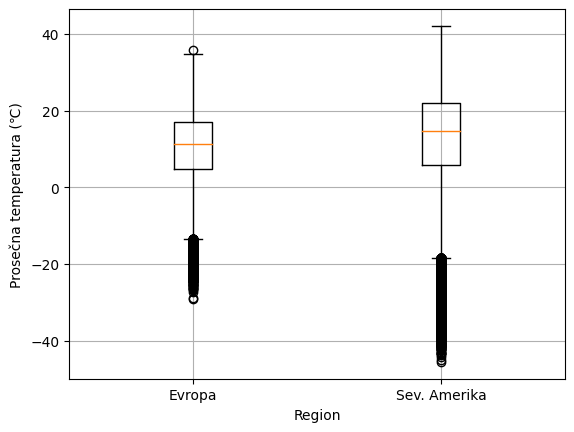

In [ ]:
# boxplot

plt.boxplot(df_region.loc['Europe','AvgTemperature'])
plt.ylabel('Prosečna temperatura (℃)')
plt.xlabel('Region')
plt.xticks([1], ["Evropa"])
plt.grid()

# prikazati uporedo Evropu i Severnu Ameriku
plt.figure()
plt.boxplot([df_region.loc['Europe','AvgTemperature'], df_region.loc['North America','AvgTemperature']])
plt.ylabel('Prosečna temperatura (℃)')
plt.xlabel('Region')
plt.xticks([1, 2], ["Evropa", "Sev. Amerika"])
plt.grid()

# bonus: uporediti prosečne temperature po mesecima

Prikazati raspodelu temperatura u Evropi i Severnoj Americi pomoću histograma. (Iskoristiti opciju za transparentnost histograma `alpha` kako bi se oba histograma mogla prikazati na istom grafiku.)

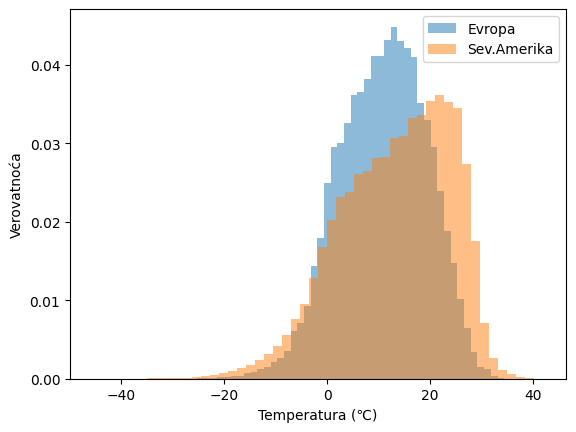

In [ ]:
# histogram
plt.hist(df_region.loc['Europe','AvgTemperature'], density=True, alpha=0.5, bins=50, label = 'Evropa')
plt.hist(df_region.loc['North America','AvgTemperature'], density=True, alpha=0.5, bins=50, label='Sev.Amerika')

plt.xlabel('Temperatura (℃)')
plt.ylabel('Verovatnoća')
plt.legend()

Kako se odnose raspodela temperatura 1995. i 2005. godine? Prikazati pomoću histograma. (Iskoristiti opciju za transparentnost histograma alpha kako bi se oba histograma mogla prikazati na istom grafiku.)

In [ ]:
# indeksirati po godini
df_year = df.set_index('Year')
df_year.tail()

,Region,Country,City,Month,Day,AvgTemperature
Year,,,,,,
2020.00,North America,US,Cheyenne,5,9.00,5.72
2020.00,North America,US,Cheyenne,5,10.00,6.17
2020.00,North America,US,Cheyenne,5,11.00,3.22
2020.00,North America,US,Cheyenne,5,12.00,5.50
2020.00,North America,US,Cheyenne,5,13.00,9.17


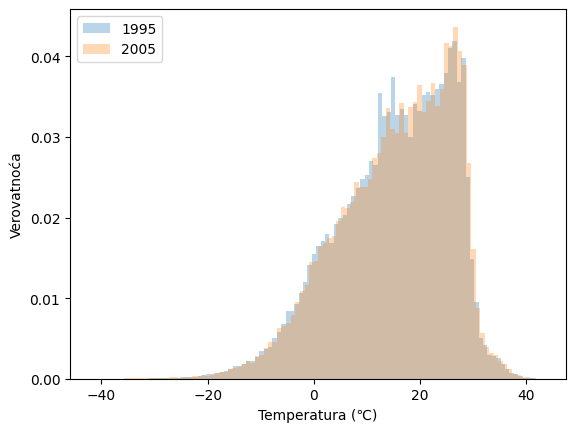

In [ ]:
# histogram
plt.hist(df_year.loc[1995,'AvgTemperature'], bins=100, density=True, alpha=0.3, label='1995')
plt.hist(df_year.loc[2005,'AvgTemperature'], bins=100, density=True, alpha=0.3, label='2005')

plt.xlabel('Temperatura (℃)')
plt.ylabel('Verovatnoća')
plt.legend(loc='upper left')

Izračunati koeficijent asimetrije i koeficijent spljoštenosti raspodele temperature za Evropu. Na osnovu ovih vrednosti, kakvu raspodelu možemo očekivati?

In [ ]:
from scipy.stats import kurtosis
from scipy.stats import skew

print('koef.asimetrije:  %.2f' % skew(df_region.loc['Europe','AvgTemperature']))
print('koef.spljoštenosti:  %.2f' % kurtosis(df_region.loc['Europe','AvgTemperature']))

koef.asimetrije:  -0.24
koef.spljoštenosti:  -0.23


Proveriti pretpostavke na osnovu koeficijenata asimetrije i spljoštenosti. Da li raspodela godišnjih temperatura u Evropi u periodu od 1995. do 2020. godine približno prati normalnu raspodelu?

<ipython-input-25-f5abf6d747a5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(temp_europe, fit=norm)


Text(0, 0.5, 'Verovatnoća')

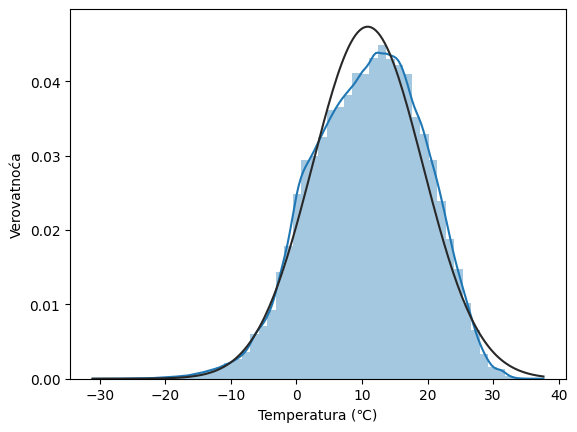

In [ ]:
import seaborn as sb
from scipy.stats import norm
temp_europe = df_region.loc['Europe','AvgTemperature']
sb.distplot(temp_europe, fit=norm)
plt.xlabel('Temperatura (℃)')
plt.ylabel('Verovatnoća')

Bolji uvid u promene temperature po godinama mogu ponuditi prosečne mesečne temperature. Izračunati ih za svaki region koristeći funkciju 'groupby'.

In [ ]:
gb = df.groupby(['Region', 'Month']). (numeric_only=True)
gb

Day    Year  AvgTemperature
Region                            Month                              
Africa                            1     15.99 2007.31           22.20
                                  2     14.64 2007.30           22.89
                                  3     16.00 2007.29           23.47
                                  4     15.50 2007.29           23.60
                                  5     15.86 2007.03           23.69
...                                       ...     ...             ...
South/Central America & Carribean 8     15.99 2006.65           21.64
                                  9     15.50 2006.64           21.85
                                  10    16.00 2006.64           21.95
                                  11    15.49 2006.63           21.77
                                  12    16.01 2006.63           21.96

[84 rows x 3 columns]

In [ ]:
df.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1.00,1995.00,17.89
1,Africa,Algeria,Algiers,1,2.00,1995.00,9.67
2,Africa,Algeria,Algiers,1,3.00,1995.00,9.33
3,Africa,Algeria,Algiers,1,4.00,1995.00,8.00
4,Africa,Algeria,Algiers,1,5.00,1995.00,8.83


In [ ]:
for reg in df['Region'].unique():
  print(reg)
  print(gb.loc[reg, 'AvgTemperature'])

Africa
Month
1    22.20
2    22.89
3    23.47
4    23.60
5    23.69
6    23.41
7    23.36
8    23.82
9    24.32
10   24.50
11   23.63
12   22.65
Name: AvgTemperature, dtype: float64
Asia
Month
1    10.40
2    12.44
3    16.54
4    20.94
5    24.35
6    26.50
7    27.54
8    27.13
9    24.70
10   20.92
11   16.14
12   11.76
Name: AvgTemperature, dtype: float64
Australia/South Pacific
Month
1    22.34
2    22.16
3    20.46
4    17.38
5    14.33
6    12.00
7    11.15
8    12.06
9    14.24
10   16.40
11   18.62
12   20.65
Name: AvgTemperature, dtype: float64
Europe
Month
1     1.66
2     2.80
3     5.96
4    10.34
5    14.66
6    18.41
7    20.49
8    20.08
9    15.92
10   11.31
11    6.43
12    2.73
Name: AvgTemperature, dtype: float64
Middle East
Month
1    12.94
2    14.38
3    17.56
4    21.96
5    26.97
6    30.20
7    32.07
8    31.99
9    29.20
10   24.98
11   19.25
12   14.74
Name: AvgTemperature, dtype: float64
North America
Month
1     1.81
2     3.49
3     7.75
4    12.82
5    1

Kako bi se uporedio odnos prosečne mesečne temperature u Evropi i Aziji (ili nekom drugom regionu), iscrtati linijski grafik i grafik rasipanja. Šta se može zaključiti iz ovih grafika?

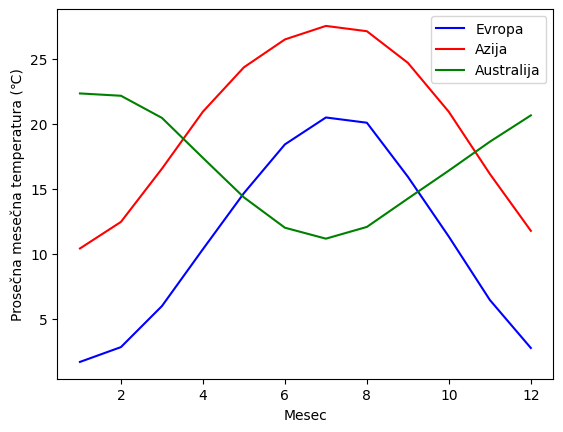

In [ ]:
gb = df.groupby(by=['Region', 'Month']).mean(numeric_only=True)
T_evropa = gb.loc['Europe']['AvgTemperature']
T_azija = gb.loc['Asia']['AvgTemperature']
T_afrika = gb.loc['Africa']['AvgTemperature']
T_amerika = gb.loc['North America']['AvgTemperature']
T_australija = gb.loc['Australia/South Pacific']['AvgTemperature']
plt.plot(np.arange(1, 13, 1), T_evropa, 'b', label='Evropa')
plt.plot(np.arange(1, 13, 1), T_azija, 'r', label='Azija')
plt.plot(np.arange(1, 13, 1), T_australija, 'g', label='Australija')
plt.ylabel('Prosečna mesečna temperatura (℃)')
plt.xlabel('Mesec')
plt.legend();

Text(0, 0.5, 'Mesečna prosečna temperatura u Aziji (℃)')

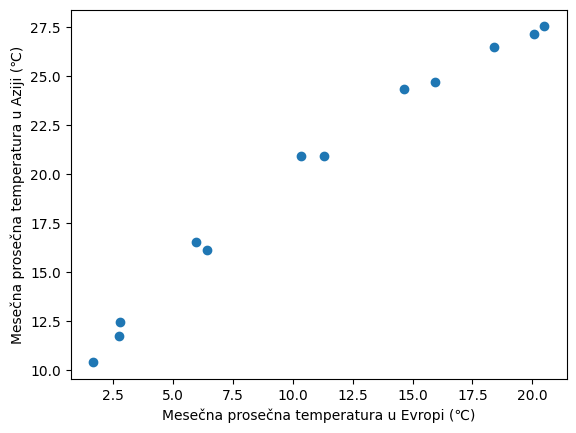

In [ ]:
plt.scatter(T_evropa, T_azija)
plt.xlabel('Mesečna prosečna temperatura u Evropi (℃)')
plt.ylabel('Mesečna prosečna temperatura u Aziji (℃)')

Text(0, 0.5, 'Mesečna prosečna temperatura u Australiji (℃)')

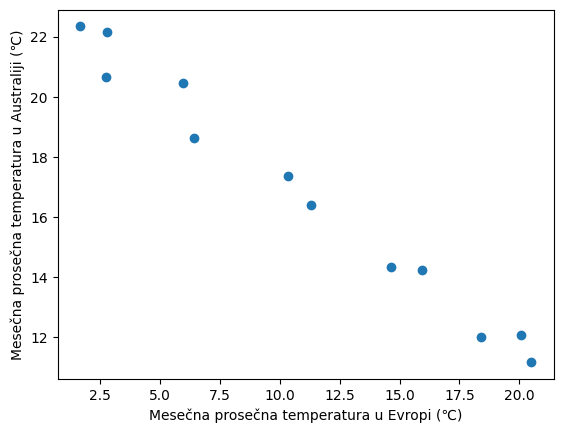

In [ ]:
plt.scatter(T_evropa, T_australija)
plt.xlabel('Mesečna prosečna temperatura u Evropi (℃)')
plt.ylabel('Mesečna prosečna temperatura u Australiji (℃)')

Kako se međusobno odnose prosečne mesečne temperatura u različitim regionima? Kolika je korelacija prosečne mesečne temperature u Evropi i Aziji (ili npr. Africi)?

In [ ]:
df_month = pd.DataFrame()
for i in df_region.index.unique():
    df_month[i] = gb.loc[i, 'AvgTemperature']
c=df_month['Europe'].corr(df_month['Asia'])
print("korelacija: %.3f" % c)

korelacija: 0.989


In [ ]:
df_month

,Africa,Asia,Australia/South Pacific,Europe,Middle East,North America,South/Central America & Carribean
Month,,,,,,,
1,22.20,10.40,22.34,1.66,12.94,1.81,22.02
2,22.89,12.44,22.16,2.80,14.38,3.49,22.29
3,23.47,16.54,20.46,5.96,17.56,7.75,22.41
4,23.60,20.94,17.38,10.34,21.96,12.82,22.43
5,23.69,24.35,14.33,14.66,26.97,17.87,21.83
6,23.41,26.50,12.00,18.41,30.20,22.30,21.35
7,23.36,27.54,11.15,20.49,32.07,24.59,21.24
8,23.82,27.13,12.06,20.08,31.99,23.89,21.64
9,24.32,24.70,14.24,15.92,29.20,20.32,21.85


Izračunati korelaciju između prosečne temperature u Evropi i u svim ostalim regionima.

In [ ]:
matrica_korelacije = df_month.corr()
print(matrica_korelacije['Europe'])

Africa                               0.59
Asia                                 0.99
Australia/South Pacific             -0.99
Europe                               1.00
Middle East                          0.99
North America                        1.00
South/Central America & Carribean   -0.71
Name: Europe, dtype: float64


Iscrtati matricu korelacije pomoću `heatmap` iz biblioteke `Seaborn`.

<Axes: >

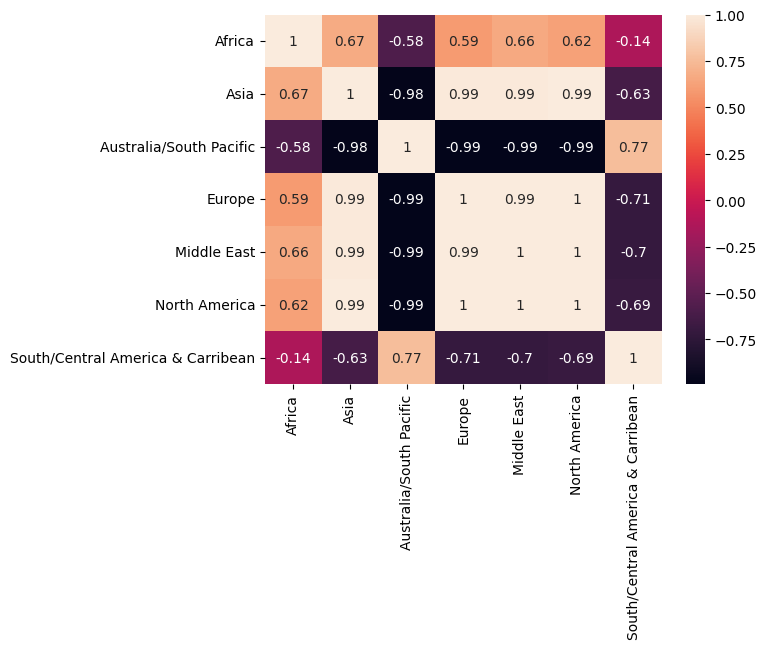

In [ ]:
import seaborn as sb

sb.heatmap(matrica_korelacije, annot=True)

Kako se može objasniti izražena negativna korelacija između Evrope i Australije? Koji regioni su najviše korelisani?